Importing whatever I need.

In [1]:
#I want to know total running time of this notebook.
import time
start_time = time.time()

In [2]:
import pandas as pd
import numpy as np
#from scipy import cluster
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [3]:
import PIL

In [4]:
data_dir = r'D:\Desktop\Python projects\Natural images dataset and projects\natural_images'

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE=(64,64)
IMAGE_SHAPE=(64,64,3)
train_datagen = ImageDataGenerator(preprocessing_function=None,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   validation_split=0.20, # set validation split
                                   rescale = (1.0/255.0))
                                   
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = IMAGE_SIZE,
    shuffle=True,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size = IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle= False,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation') # set as validation data

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


In [6]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), input_shape = (64,64,3),
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=96, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=160, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(8, activation='softmax'))

In [7]:
optimizer = optimizers.Adadelta()

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 96)        153696    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         307328    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)        

In [9]:
epochs = 30

model_history = model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=epochs, verbose=1, 
                    callbacks=None, validation_data=validation_generator, 
                    validation_steps=len(validation_generator), 
                    class_weight=None, max_queue_size=10, workers=1, 
                    use_multiprocessing=False, shuffle=True, initial_epoch=0)

Epoch 1/30
173/173 [==============================] - 96s 556ms/step - loss: 1.8904 - accuracy: 0.2505 - val_loss: 1.5971 - val_accuracy: 0.4299
Epoch 2/30
173/173 [==============================] - 70s 402ms/step - loss: 1.2734 - accuracy: 0.5455 - val_loss: 1.7053 - val_accuracy: 0.6747
Epoch 3/30
173/173 [==============================] - 51s 294ms/step - loss: 0.7650 - accuracy: 0.7229 - val_loss: 1.7282 - val_accuracy: 0.7291
Epoch 4/30
173/173 [==============================] - 34s 194ms/step - loss: 0.5847 - accuracy: 0.7841 - val_loss: 0.6380 - val_accuracy: 0.7487
Epoch 5/30
173/173 [==============================] - 35s 200ms/step - loss: 0.4942 - accuracy: 0.8164 - val_loss: 0.0141 - val_accuracy: 0.8286
Epoch 6/30
173/173 [==============================] - 33s 190ms/step - loss: 0.4209 - accuracy: 0.8415 - val_loss: 7.9791e-04 - val_accuracy: 0.8526
Epoch 7/30
173/173 [==============================] - 33s 189ms/step - loss: 0.3892 - accuracy: 0.8569 - val_loss: 0.0011 - va

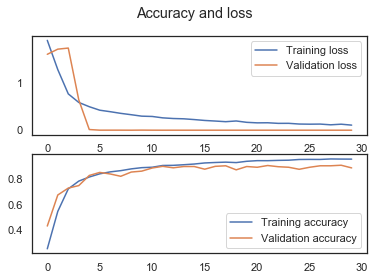

In [12]:
fig, ax = plt.subplots(2,1)
plt.suptitle('Accuracy and loss')
ax[0].plot(model_history.history['loss'], label = 'Training loss')
ax[0].plot(model_history.history['val_loss'], label = 'Validation loss')
ax[0].legend(loc = 'best')

ax[1].plot(model_history.history['accuracy'], label = 'Training accuracy')
ax[1].plot(model_history.history['val_accuracy'], label = 'Validation accuracy')
ax[1].legend(loc = 'best')

In [13]:
#Total runtime
print(f'Total runtime is {round(time.time()-start_time,2)}')

Total runtime is 1226.08
